# Power Transformation
- Box-Cox
- Yeo-Johnson

## Data collection

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Datasets/concrete_data.csv')

In [3]:
df.sample(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
246,238.1,0.0,94.1,186.7,7.0,949.9,847.0,28,30.23
499,491.0,26.0,123.0,210.0,3.9,882.0,699.0,28,55.55


## Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:8]
y = df.iloc[:,-1]

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [6]:
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(824, 8) (206, 8) (824,) (206,)


## Visualizing distribution of each column

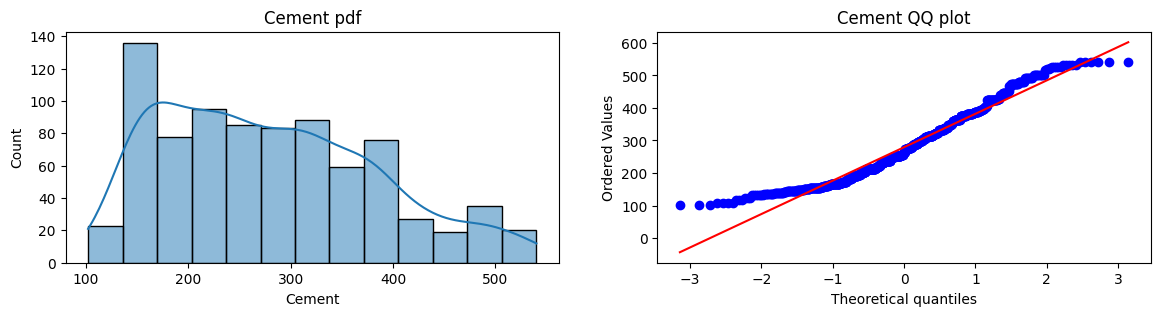

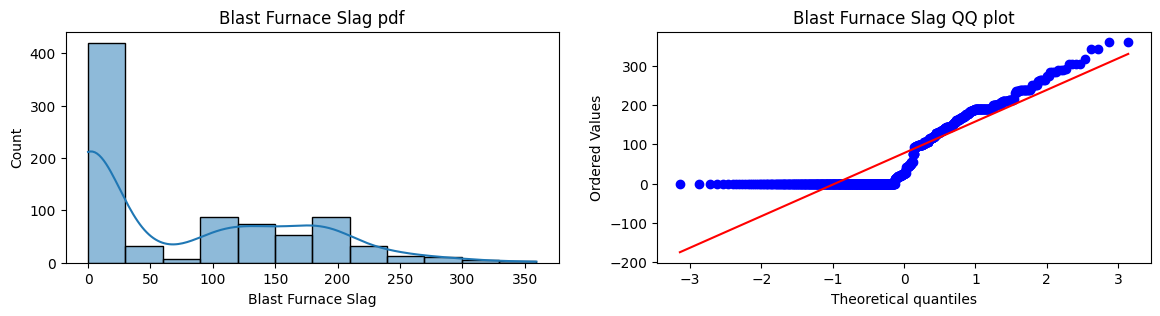

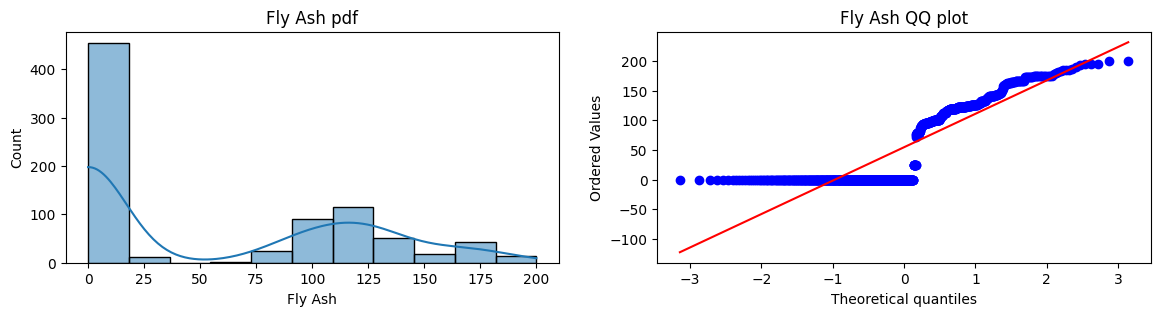

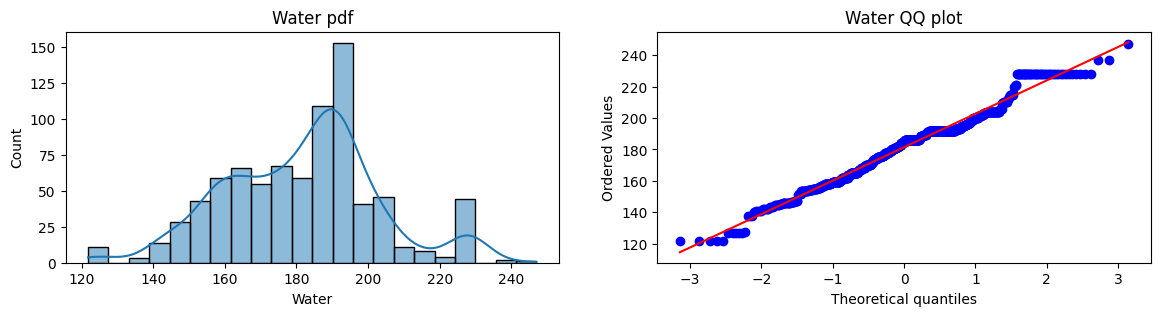

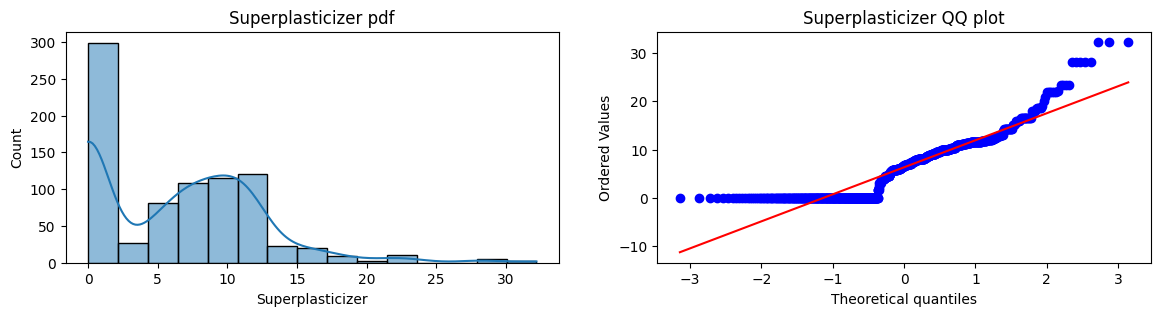

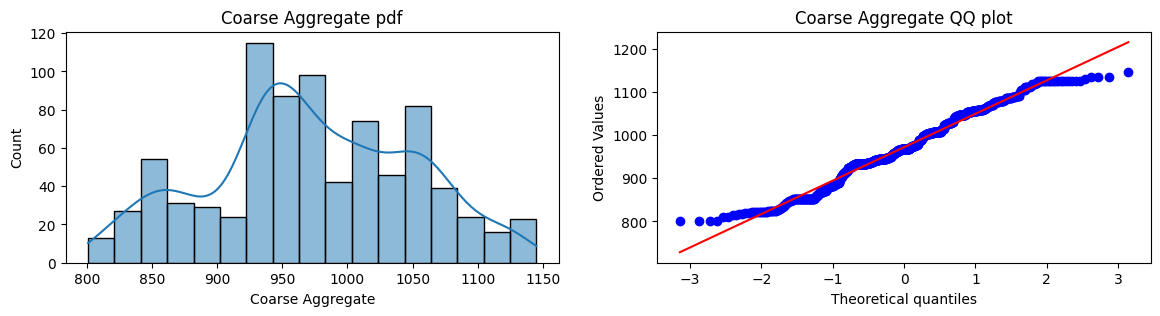

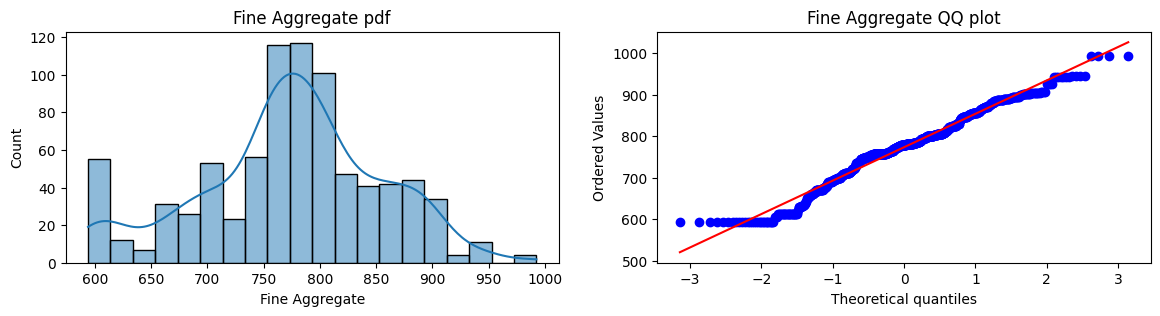

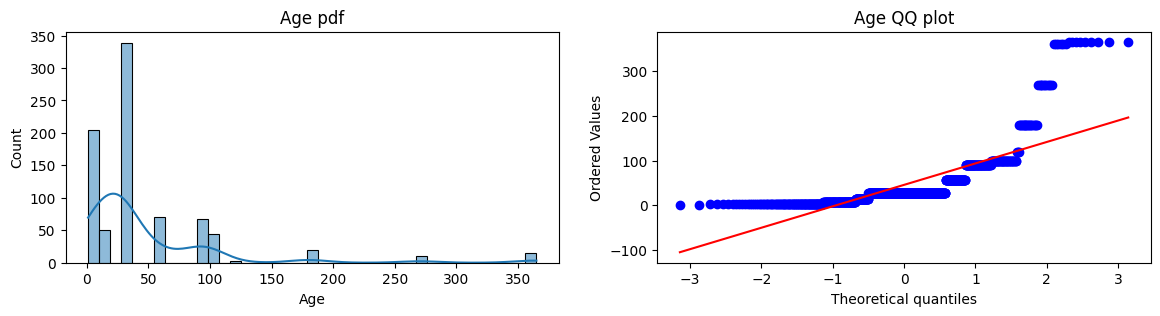

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
for col in X_train.columns:
    plt.figure(figsize=(14,3))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col+' pdf')

    plt.subplot(122)
    stats.probplot(X_train[col],dist = 'norm',plot = plt)
    plt.title(col+' QQ plot')

    plt.show()


## Checking accuracy before applying transformation

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [9]:
lr = LinearRegression()

clf = lr.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [10]:
print("r2_score =",r2_score(y_test,y_pred) )

r2_score = 0.6369606518338295


- The cross_val_score function is designed to evaluate the model using cross-validation, which involves splitting the dataset into several folds and training the model multiple times, each time on a different training set and validating on a different validation set.
- Hence, cross_val_score takes X and y instead of X_train and y_train

In [11]:
print("r2_score after cross val = ",cross_val_score(lr,X,y,scoring='r2').mean())

r2_score after cross val =  0.4609940491662865


## Applying power transformation

In [12]:
#1. Box cox
from sklearn.preprocessing import PowerTransformer
trf = PowerTransformer(method = 'box-cox')

In [13]:
# Added 0.00001 just to make sure none of the nos is 0.
X_train_transformed = trf.fit_transform(X_train+0.000001)
X_test_transformed = trf.transform(X_test+0.000001)

X_train_transformed = pd.DataFrame(X_train_transformed, columns = X_train.columns)
# after applying the transformation the trf will remeber the 'lambda' for each column.
pd.DataFrame({'cols': X_train_transformed.columns, 'lambda':trf.lambdas_})

,cols,lambda
0,Cement,0.153049
1,Blast Furnace Slag,0.031295
2,Fly Ash,-0.034123
3,Water,0.888072
4,Superplasticizer,0.108879
5,Coarse Aggregate,1.115681
6,Fine Aggregate,1.789591
7,Age,0.063010


In [14]:
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred = lr.predict(X_test_transformed)
print("r2_score = ",r2_score(y_test,y_pred))

r2_score =  0.8134350093135743


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
X_transformed = trf.fit_transform(X+0.000001)
print("r2_score_after transformation = ",cross_val_score(lr,X_transformed,y,scoring = 'r2').mean())

r2_score_after transformation =  0.6662950324463969


## Visualization of before and after transformation

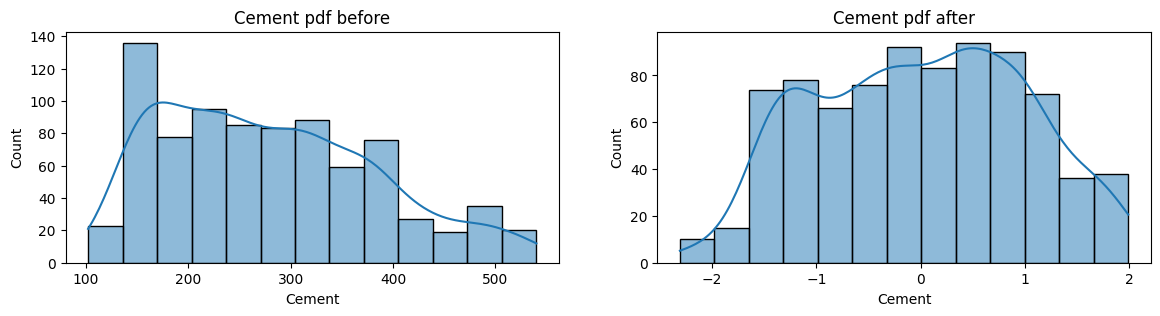

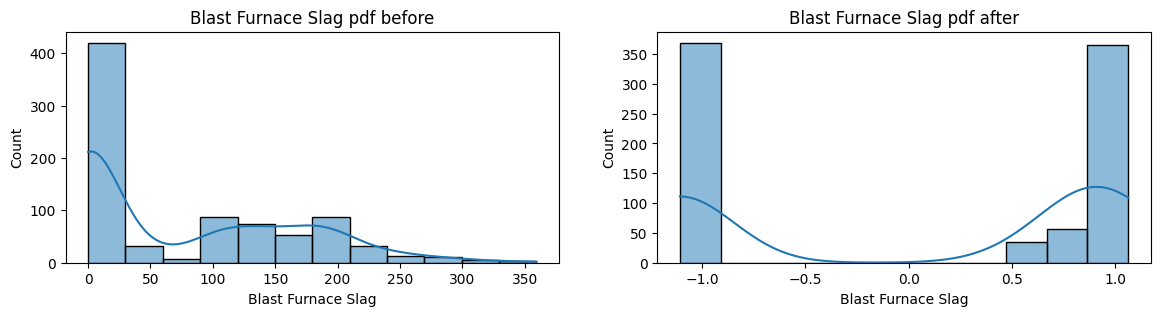

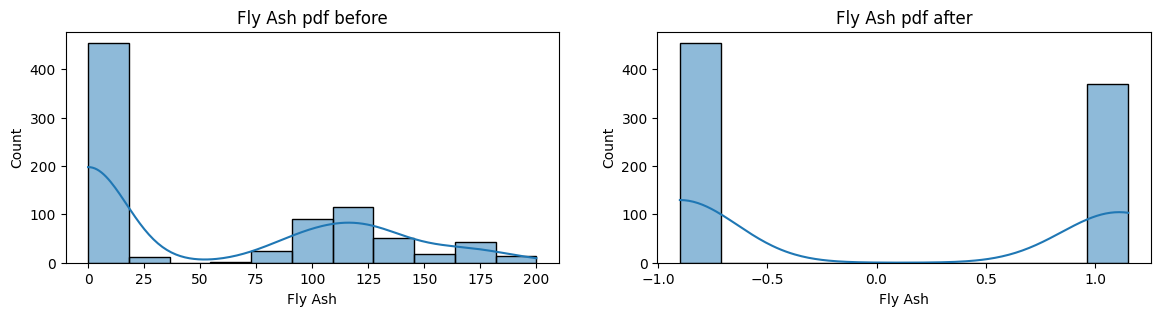

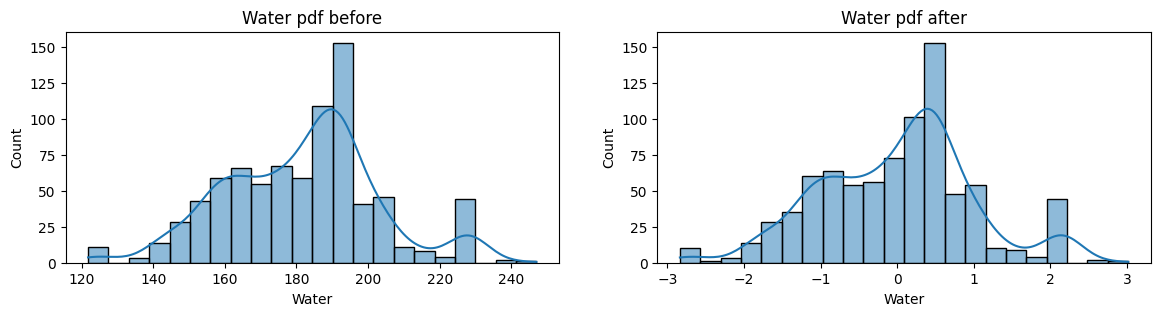

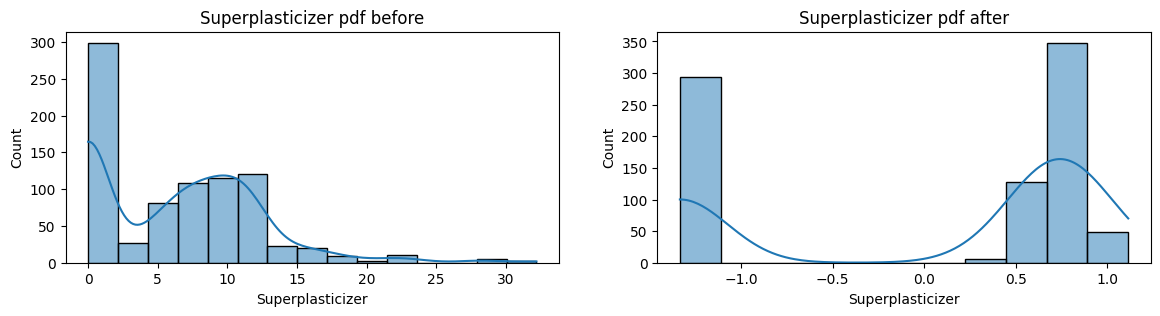

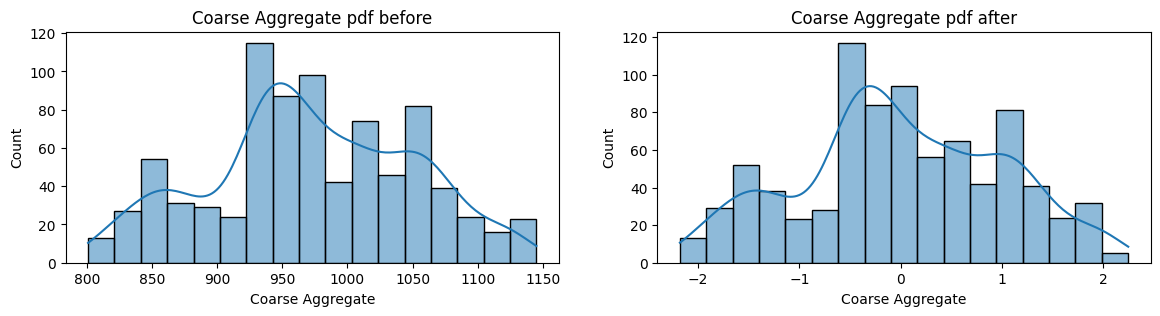

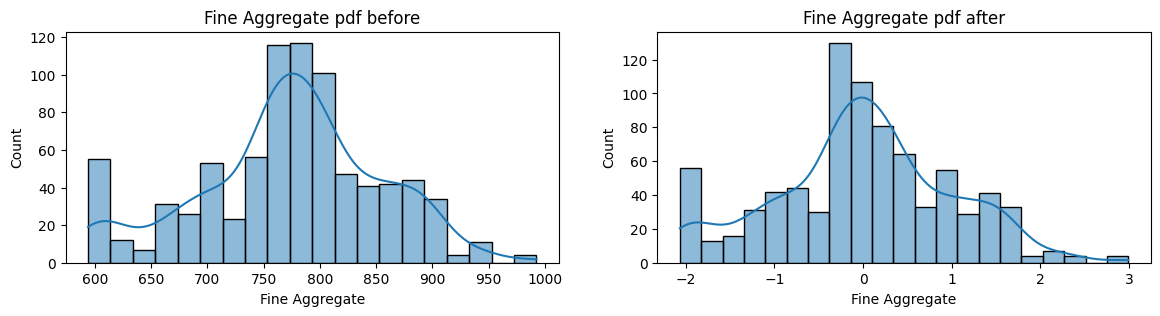

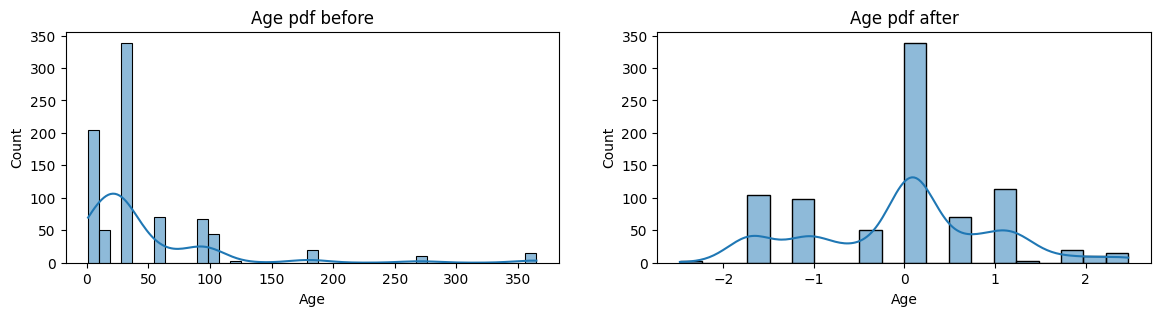

In [16]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,3))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col+' pdf before')

    plt.subplot(122)
    sns.histplot(X_train_transformed[col],kde=True)
    plt.title(col+' pdf after')

    plt.show()

In [17]:
#2. Yeo-Johnson
#NOTE: default method of PowerTransformer is 'yeo-johnson'.
pt = PowerTransformer()

X_train_transformed2 = pt.fit_transform(X_train)
X_test_transformed2 = pt.transform(X_test)

X_train_transformed2 = pd.DataFrame(X_train_transformed2, columns = X_train.columns)
X_test_transformed2 = pd.DataFrame(X_test_transformed2, columns = X_test.columns)

pd.DataFrame({'cols':X_train_transformed2.columns, 'lambda':pt.lambdas_})

,cols,lambda
0,Cement,0.150260
1,Blast Furnace Slag,0.038667
2,Fly Ash,-0.141876
3,Water,0.887369
4,Superplasticizer,0.293603
5,Coarse Aggregate,1.115901
6,Fine Aggregate,1.790678
7,Age,0.016397


In [18]:
lr2 = LinearRegression()

In [19]:
lr2.fit(X_train_transformed2,y_train)

y_pred2 = lr2.predict(X_test_transformed2)

print("r2_score = ",r2_score(y_test,y_pred2))


r2_score =  0.8253744908767402


In [20]:
X_transformed2 = pt.fit_transform(X)
print("r2_score_after transformation = ",cross_val_score(lr,X_transformed2,y,scoring = 'r2').mean())

r2_score_after transformation =  0.6834625141500864


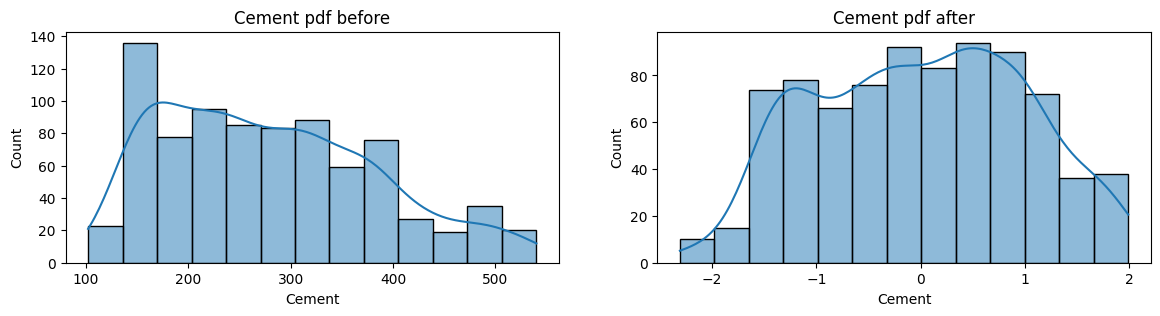

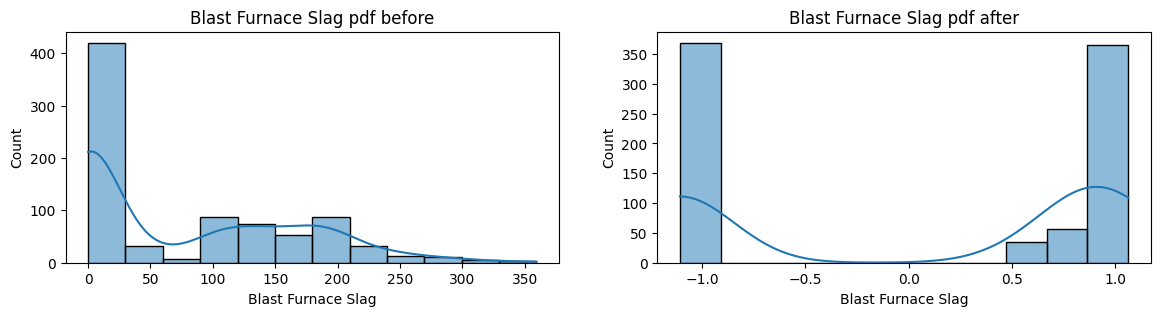

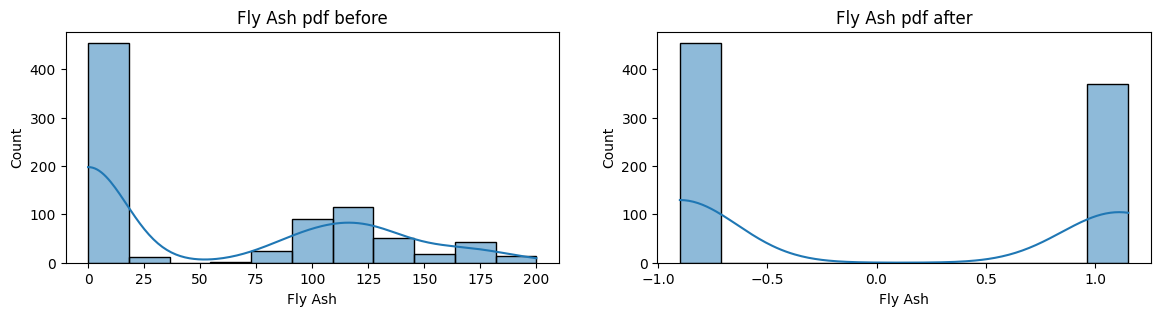

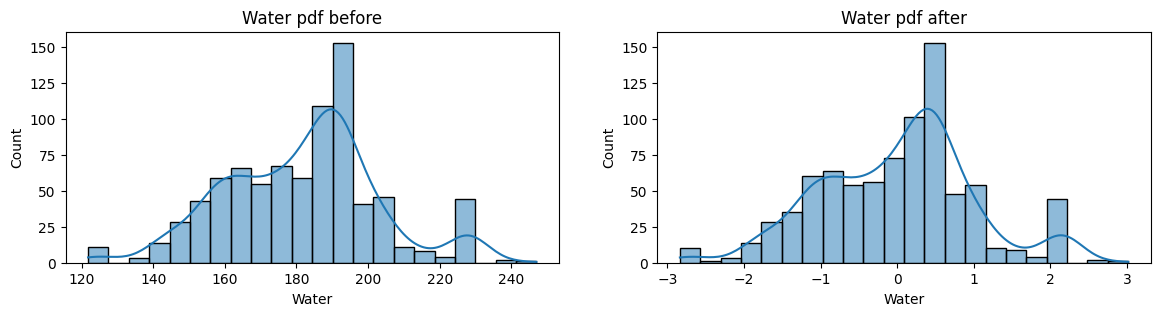

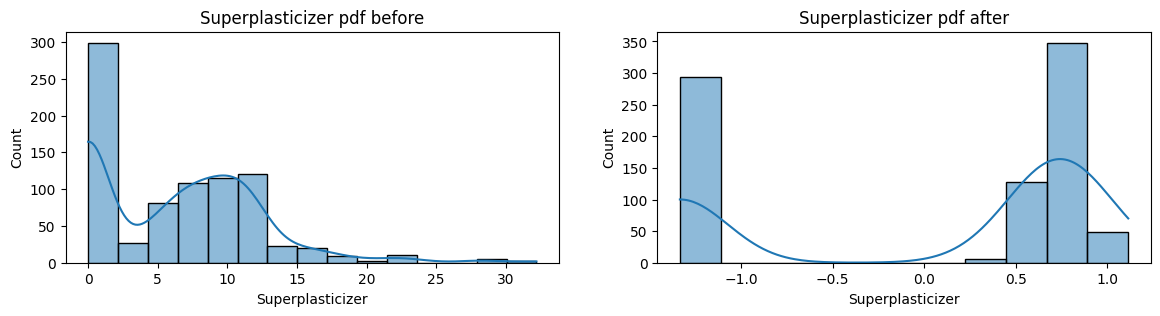

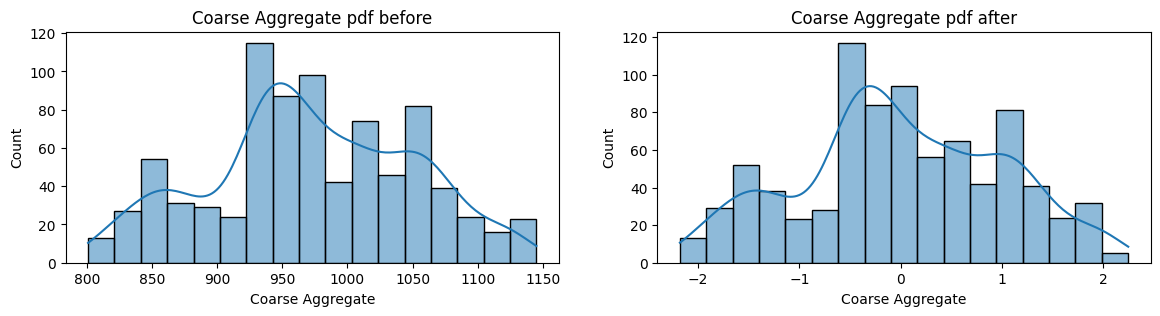

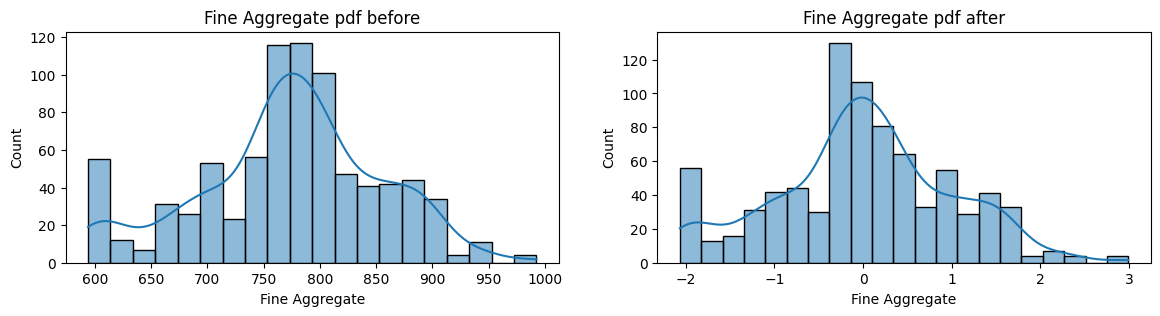

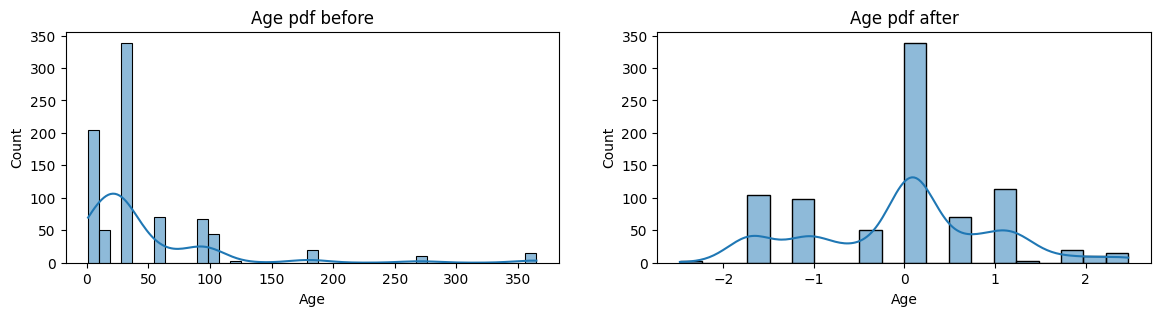

In [21]:
for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,3))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col+' pdf before')

    plt.subplot(122)
    sns.histplot(X_train_transformed[col],kde=True)
    plt.title(col+' pdf after')

    plt.show()

In [22]:
print("r2_score after cross val = ",cross_val_score(lr,X,y,scoring='r2').mean())
print("r2_score_after transformation using box-cox = ",cross_val_score(lr,X_transformed,y,scoring = 'r2').mean())
print("r2_score_after transformation using yeo-johnson = ",cross_val_score(lr,X_transformed2,y,scoring = 'r2').mean())


r2_score after cross val =  0.4609940491662865
r2_score_after transformation using box-cox =  0.6662950324463969
r2_score_after transformation using yeo-johnson =  0.6834625141500864


## Conclusion
- Hence you can see after transformation accuracy is increased